Status init
T init


<ipython-input-1-478dd3b226ac>:104: RuntimeWarning: overflow encountered in double_scalars
  temp = (1/F[i,j])**2 + min(a,b)
<ipython-input-1-478dd3b226ac>:102: RuntimeWarning: overflow encountered in double_scalars
  temp = (a+b+math.sqrt(2*(1/F[i,j])**2 - (a-b)**2))/2
<ipython-input-1-478dd3b226ac>:101: RuntimeWarning: overflow encountered in double_scalars
  if (1/F[i,j]) > abs(a-b):
<ipython-input-1-478dd3b226ac>:101: RuntimeWarning: divide by zero encountered in double_scalars
  if (1/F[i,j]) > abs(a-b):
<ipython-input-1-478dd3b226ac>:104: RuntimeWarning: divide by zero encountered in double_scalars
  temp = (1/F[i,j])**2 + min(a,b)
<ipython-input-1-478dd3b226ac>:101: RuntimeWarning: invalid value encountered in double_scalars
  if (1/F[i,j]) > abs(a-b):


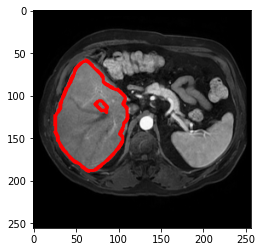

In [1]:
import heapq
import math
import numpy as np
import scipy.ndimage
import scipy.signal
import matplotlib.pyplot as plt
from skimage import color, io
from skimage.transform import resize
import itertools
from heapq import heappush, heappop
import sys
np.set_printoptions(threshold=sys.maxsize)

class PriorityQueue:
    def __init__(self):
        self.pq = []                         # list of entries arranged in a heap
        self.entry_finder = {}               # mapping of tasks to entries
        self.REMOVED = '<removed-task>'      # placeholder for a removed task
        self.counter = itertools.count()     # unique sequence count
            
    def add(self,task, priority=0):
        'Add a new task or update the priority of an existing task'
        if task in self.entry_finder:
            if self.entry_finder[task][0] > priority:
                self.remove(task)
                count = next(self.counter)
                entry = [priority, count, task]
                self.entry_finder[task] = entry
                heappush(self.pq, entry)
            else:
                return
        if task not in self.entry_finder:
            count = next(self.counter)
            entry = [priority, count, task]
            self.entry_finder[task] = entry
            heappush(self.pq, entry)

    def remove(self,task):
        'Mark an existing task as REMOVED.  Raise KeyError if not found.'
        entry = self.entry_finder.pop(task)
        entry[-1] = self.REMOVED

    def pop(self):
        'Remove and return the lowest priority task. Raise KeyError if empty.'
        while pq:
            priority, count, task = heappop(self.pq)
            if task is not self.REMOVED:
                del self.entry_finder[task]
                return task, priority
        raise KeyError('pop from an empty priority queue')
    def empty(self):
        return len(self.pq) == 0

def grad(x): #đạo hàm
    return np.array(np.gradient(x))


def norm(x, axis=0):
    return np.sqrt(np.sum(np.square(x), axis=axis))


def speed_func(x, alpha):
    return np.exp(-alpha * (norm(grad(x))**2))

def default_status(x,startY,startX):
    phi = np.ones(x.shape[:2])
    phi[:] = -1
    phi[startX,startY] = 1
    phi[startX+1,startY] = 0
    phi[startX-1,startY] = 0
    phi[startX,startY+1] = 0
    phi[startX,startY-1] = 0
    return phi
#(i,j) = 1 là known
#(i,j) = 0 là neighbor
#(i,j) = -1 là far
def n2k(status,y,x):
    status[x,y] = 1
def f2n(status,y,x):
    if status[x+1,y] == -1.:
        status[x+1,y] = 0

    if status[x-1,y] == -1.: 
        status[x-1,y] = 0
        
    if status[x,y+1] == -1.:
        status[x,y+1] = 0

    if status[x,y-1] == -1.:
        status[x,y-1] = 0

def default_T(x,startY,startX):
    T = np.ones(x.shape[:2])
    T[:]=np.inf
    T[startX,startY] = 0
    return T
def calc_t(t,j,i,F): 
    a = min(t[i-1,j],t[i+1,j])
    b = min(t[i,j-1],t[i,j+1])
##    print("{0} and {1}".format(a,b))
    if (1/F[i,j]) > abs(a-b):
        temp = (a+b+math.sqrt(2*(1/F[i,j])**2 - (a-b)**2))/2
    else:
        temp = (1/F[i,j])**2 + min(a,b)
    return temp

def addtime(t, value, x, y):
    t[y,x] = value

#(i,j) = 1 là known
#(i,j) = 0 là neighbor
#(i,j) = -1 là far
img = io.imread('D:\studies\word_image_generator-master\Liver_MRI0001\phase1\img0059.dcm')
# image_resized = resize(img, (8, 8),anti_aliasing=True)
# image_resized = color.rgb2gray(image_resized)
img_smooth = scipy.ndimage.filters.gaussian_filter(img, 4)
F = speed_func(img_smooth, 2)
startX = 70
startY = 140

status = default_status(img_smooth,startX,startY)
print('Status init')
##print(status)
t = default_T(img_smooth,startX,startY)
print('T init')
##print(t)

pq = PriorityQueue()

for i in range(7000): #7000 for the right organ, 3000 for the left organ
    #tính tất cả neighbor
    #add vo queue
    #pop ra cái đầu
    #update vô 2 matrix
    #add neihgbor mới nếu chưa là neighbor
    #lặp lại
    for y in range(status.shape[0]):
        for x in range(status.shape[1]):
            if x < img.shape[0]-1 and y < img.shape[1]-1:
                if status[y,x] == 0:
                    temp = calc_t(t,x,y,F)
                    pq.add((x,y),temp)
                
    
    obj = pq.pop()
    m,j = obj[0]
    time = obj[1]
    addtime(t,time,m,j)
    n2k(status,m,j)
    f2n(status,m,j)
    

##print('Status final')
##print(status)
##print('T final')
##print(t)
plt.imshow(img, cmap='Greys_r')
plt.contour(status, 1, colors='r', linewidths=[3])
plt.draw()
plt.show()

    
    


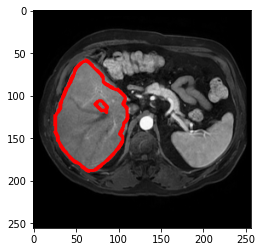

In [2]:
dt = 1
for i in range(800):
    dphi = grad(status)
    dphi_norm = norm(dphi)

    dphi_t = -F * dphi_norm

    status = status + dt * dphi_t
    
##print('Status final')
##print(status)
##print('T final')
##print(t)
plt.imshow(img, cmap='Greys_r')
plt.contour(status, 1, colors='r', linewidths=[3])
plt.draw()
plt.show()